In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [21]:
#cargamos nodos
nodos=pd.read_csv('quakers_nodelist.csv',header=None,
                 names=['Name','HistoricalSignificance','Birthdate','Deathdate','ID','Gender'])
#cargamos aristas
aristas=pd.read_csv('quakers_edgelist.csv',header=None,
                   names=['Source','Target'])

nodos.head(10)

,Name,HistoricalSignificance,Birthdate,Deathdate,ID,Gender
0,Joseph Wyeth,religious writer,1663,1731,10013191,male
1,Alexander Skene of Newtyle,local politician and author,1621,1694,10011149,male
2,James Logan,colonial official and scholar,1674,1751,10007567,male
3,Dorcas Erbery,Quaker preacher,1656,1659,10003983,female
4,Lilias Skene,Quaker preacher and poet,1626,1697,10011152,male
5,William Mucklow,religious writer,1630,1713,10008595,male
6,Thomas Salthouse,Quaker preacher and writer,1630,1691,10010643,male
7,William Dewsbury,Quaker activist,1621,1688,10003478,male
8,John Audland,Quaker preacher,1630,1664,10000411,male
9,Richard Claridge,Quaker minister and schoolmaster,1649,1723,10002469,male


In [22]:
aristas.head(10)

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn
5,George Keith,George Fox
6,George Keith,George Whitehead
7,George Keith,William Bradford
8,James Parnel,Benjamin Furly
9,James Parnel,Stephen Crisp


In [23]:
#construimos el grafo
graph = nx.Graph()
#añadimos los nodos
for name,historicalSignificance,gender,birthdate,deathdate,Id in zip(nodos['Name'],nodos['HistoricalSignificance'],nodos['Gender'],nodos['Birthdate'],nodos['Deathdate'],nodos['ID']):
    graph.add_node(name, Name=name,HistoricalSignificance=historicalSignificance,Gender=gender,Birthdate=birthdate,Deathdate=deathdate,Id=Id)
#añadimos las aristas
for source,target in zip(aristas['Source'],aristas['Target']):
    graph.add_edge(source,target)
#print(list(graph.nodes))
#print(list(graph.edges))
#graph.nodes.data()
#graph.edges.data()
#graph.number_of_nodes()

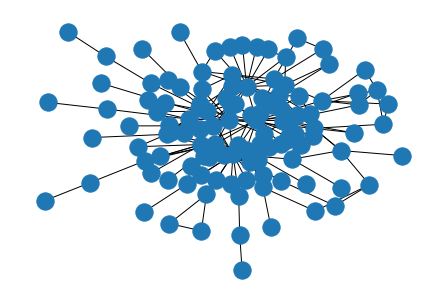

In [24]:
#dibujamos el grafo
nx.draw_kamada_kawai(graph)
plt.show()

In [25]:
from sklearn import preprocessing

In [26]:
atributos = nodos.loc[:,'Name':'ID']
objetivo = nodos['Gender']

In [140]:
# Para realizar una codificación de los datos, se crea una instancia del tipo de
# codificación pretendida y se ajusta a los datos disponibles mediante el método fit.

codificador_atributos = preprocessing.OrdinalEncoder()
codificador_atributos.fit(atributos)

#Con este comando miras los valores que puede haber cuando el atributo ya esta codificado
print(codificador_atributos.categories_)

[array(['Alexander Parker', 'Alexander Skene of Newtyle', 'Alice Curwen',
       'Anne Camm', 'Anne Conway Viscountess Conway and Killultagh',
       'Anthony Pearson', 'Anthony Sharp', 'Benjamin Furly',
       'Charles Marshall', 'Christopher Taylor', 'Daniel Quare',
       'David Barclay', 'David Barclay of Ury', 'David Lloyd',
       'Dorcas Erbery', 'Dorothy Waugh', 'Edward Burrough',
       'Edward Haistwell', 'Edward Pyott', 'Elizabeth Hooten',
       'Elizabeth Leavens', 'Ellis Hookes', 'Fettiplace Bellers',
       'Francis Bugg', 'Francis Howgill',
       'Franciscus Mercurius van Helmont', 'George Bishop', 'George Fox',
       'George Fox the younger', 'George Keith', 'George Whitehead',
       'Gervase Benson', 'Gideon Wanton', 'Gilbert Latey',
       'Grace Chamber', 'Hannah Stranger', 'Henry Pickworth',
       'Humphrey Norton', 'Humphrey Woolrich', 'Isaac Norris',
       'Isabel Yeamans', 'James Claypoole', 'James Logan', 'James Nayler',
       'James Parnel', 'Jane Sowle'

In [90]:
# Una vez ajustado el codificador, el método transform permite codificar los
# valores de los atributos
atributos_codificados = codificador_atributos.transform(atributos)
print(atributos_codificados)

[[ 65.  61.  51.  56. 116.]
 [  1.  42.  24.  29.  93.]
 [ 42.  38.  58.  66.  65.]
 [ 14.  25.  49.   2.  39.]
 [ 69.  28.  28.  32.  94.]
 [114.  61.  31.  46.  70.]
 [102.  29.  31.  27.  89.]
 [110.   1.  24.  24.  35.]
 [ 46.  25.  31.   7.   3.]
 [ 79.  19.  44.  52.  24.]
 [106.  58.  51.  67.  14.]
 [ 22.  53.  63.  65.   7.]
 [ 48.  55.  47.  54.   8.]
 [ 40.  25.  37.  38. 117.]
 [ 28.  61.   0.   4.  46.]
 [ 27.   0.  26.  27.  47.]
 [ 57.  15.  21.  15. 100.]
 [  3.  25.  29.  39.  18.]
 [ 50.  25.  13.   1.  19.]
 [ 96.  29.  40.  41.  20.]
 [ 66.  21.  21.  28.  40.]
 [ 70.  15.  62.  70.  60.]
 [ 86.   1.  32.  38.  25.]
 [101.   2.  33.  50.  66.]
 [ 31.  11.   6.  17.   9.]
 [ 93.   3.  30.  28.  30.]
 [ 41.  47.  34.  23.  26.]
 [ 99.  21.  28.   9.  54.]
 [ 52.  34.  52.  62.  48.]
 [ 58.  56.  23.  17. 101.]
 [113.  24.  29.  46.  68.]
 [ 36.  60.  57.  58.  82.]
 [ 51.  13.  19.  34.  31.]
 [ 33.   1.  28.  39.  61.]
 [ 21.   5.  35.  18.  55.]
 [ 64.  40.  62.  69

In [29]:
# El codificador adecuado para la variable objetivo es LabelEncoder, que trabaja
# con una lista o array unidimensional de sus valores
codificador_objetivo = preprocessing.LabelEncoder()
# El método fit_transform ajusta la codificación y la aplica a los datos justo
# a continuación
objetivo_codificado = codificador_objetivo.fit_transform(objetivo)

In [30]:
# Clases detectadas por el codificador para la variable objetivo
print(codificador_objetivo.classes_)

['female' 'male']


In [31]:
#1 es male, 0 es female
print(objetivo_codificado)
# Las respuestas predichas por los modelos estarán codificadas, pero el codificador
# también permite descodificarlas
print(codificador_objetivo.inverse_transform([1, 0, 1]))

[1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1
 0 1 1 1 1 1 1 0]
['male' 'female' 'male']


In [32]:
# Cantidad total de ejemplos
#print(nodos.shape[0])
# Frecuencia total de cada clase de aceptabilidad (porcentaje de cada valor objetivo en nuestro conjunto)
print(pd.Series(objetivo).value_counts(normalize=True))

male      0.815126
female    0.184874
Name: Gender, dtype: float64


In [33]:
from sklearn import model_selection

In [34]:
(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = model_selection.train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos_codificados, objetivo_codificado,
        # Valor de la semilla aleatoria, para que el muestreo sea reproducible,
        # a pesar de ser aleatorio
        random_state=12345,
        # Tamaño del conjunto de prueba
        test_size=.20,
        # Estratificamos respecto a la distribución de valores en la variable objetivo
        stratify=objetivo_codificado)

In [35]:
#Comprobamos que tiene todo los valores correctos del conjunto de pruebas
print('Cantidad de ejemplos de pruebas requeridos:', 119 * .20)
print('Filas del array de atributos de prueba:', atributos_prueba.shape[0])
print('Longitud del vector de objetivos de prueba:', len(objetivo_prueba))
print('Proporción de clases en el vector de objetivos de prueba:')
print(pd.Series(
        codificador_objetivo.inverse_transform(objetivo_prueba)
      ).value_counts(normalize=True))

Cantidad de ejemplos de pruebas requeridos: 23.8
Filas del array de atributos de prueba: 24
Longitud del vector de objetivos de prueba: 24
Proporción de clases en el vector de objetivos de prueba:
male      0.833333
female    0.166667
dtype: float64


In [36]:
#Comprobamos que tiene todo los valores correctos del conjunto de pruebas
print('Cantidad de ejemplos de entrenamiento requeridos:', 119 * .80)
print('Filas del array de atributos de entrenamiento:', atributos_entrenamiento.shape[0])
print('Longitud del vector de objetivos de entrenamiento:', len(objetivo_entrenamiento))
print('Proporción de clases en el vector de objetivos de entrenamiento:')
print(pd.Series(# Comprobamos que el 
        codificador_objetivo.inverse_transform(objetivo_entrenamiento)
      ).value_counts(normalize=True))

Cantidad de ejemplos de entrenamiento requeridos: 95.2
Filas del array de atributos de entrenamiento: 95
Longitud del vector de objetivos de entrenamiento: 95
Proporción de clases en el vector de objetivos de entrenamiento:
male      0.810526
female    0.189474
dtype: float64


Para realizar aprendizaje supervisado en _sklearn_, basta crear una instancia de la clase de objetos que implemente el modelo que se quiera utilizar (_naive_ Bayes, árboles de decisión, _kNN_, etc.).

Cada una de estas instancias dispondrá de los siguientes métodos:
* El método `fit` permite entrenar el modelo, dados __por separado__ el conjunto de ejemplos de entrenamiento y la clase de cada uno de estos ejemplos.
* El método `predict` permite clasificar un nuevo ejemplo una vez entrenado el modelo.
* El método `score` calcula el rendimiento del modelo, dados __por separado__ el conjunto de ejemplos de prueba y la clase de cada uno de estos ejemplos.

In [37]:
#Hasta aqui lo he hemos hecho ha sido leer del csv los datos, meterlos en 1 conjunto de entrenamiento (80%)
#y otro de pruebas(20%), despues hemos codificado, estos datos para que sean utilizables por los modelos
#y ahora vamos a definir los modelos para hacer el entrenamiento de la maquina.
#El primero a utilizar será Naive Bayes
from sklearn import naive_bayes
#print(atributos_entrenamiento)
#print(objetivo_entrenamiento)
#Aqui hemos tenido que arreglar el dataset porque había algunas incongruencias, y hemos tenido que cambiar algunos datos,
#esto nos ha llevado 1 dia saber porque fallaba

In [38]:
#definimos nuestro parámetro de suavizado
clasif_NB = naive_bayes.CategoricalNB(alpha=1.0)
#llamamos al metodo .fit para entrenar nuestro modelo
clasif_NB.fit(atributos_entrenamiento, objetivo_entrenamiento)

CategoricalNB()

In [39]:
for clase, cantidad_ejemplos_clase, log_probabilidad_clase in zip(
    codificador_objetivo.classes_, clasif_NB.class_count_, clasif_NB.class_log_prior_):
        print(f'Cantidad de ejemplos para la clase {clase}: {cantidad_ejemplos_clase}')
        print(f'Logaritmo de la probabilidad aprendida para la clase {clase}: {log_probabilidad_clase}')

Cantidad de ejemplos para la clase female: 18.0
Logaritmo de la probabilidad aprendida para la clase female: -1.6635051337043762
Cantidad de ejemplos para la clase male: 77.0
Logaritmo de la probabilidad aprendida para la clase male: -0.21007146974685664


In [133]:
for i, atributo in enumerate(nodos.columns[:-1]):
    print(f'Cantidad de ejemplos para el atributo {atributo}:')
    print(pd.DataFrame(clasif_NB.category_count_[i],
                          columns=codificador_atributos.categories_[i],
                          index=codificador_objetivo.classes_))
    print(f'Logaritmos de las probabilidades aprendidas para el atributo {atributo}:')
    print(pd.DataFrame(clasif_NB.feature_log_prob_[i],
                          columns=codificador_atributos.categories_[i],
                          index=codificador_objetivo.classes_))
    print()

Cantidad de ejemplos para el atributo Name:
        Alexander Parker  Alexander Skene of Newtyle  Alice Curwen  Anne Camm  \
female               0.0                         0.0           1.0        0.0   
male                 1.0                         1.0           0.0        0.0   

        Anne Conway Viscountess Conway and Killultagh  Anthony Pearson  \
female                                            1.0              0.0   
male                                              0.0              1.0   

        Anthony Sharp  Benjamin Furly  Charles Marshall  Christopher Taylor  \
female            0.0             0.0               0.0                 0.0   
male              1.0             1.0               1.0                 1.0   

        ...  William Crouch  William Dewsbury  William Edmundson  \
female  ...             0.0               0.0                0.0   
male    ...             0.0               1.0                0.0   

        William Gibson  William Mead  William 

ValueError: Shape of passed values is (2, 64), indices imply (2, 65)

In [106]:
nuevos_ejemplos = pd.DataFrame([['Joseph Wyeth', 'religious writer', 1621, 1751, 10013191],
                                    ['Lilias Skene', 'Quaker preacher and poet', 1676, 1697, 10011152]],
                                   columns=nodos.columns[:-1])
nuevos_ejemplos

,Name,HistoricalSignificance,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,1621,1751,10013191
1,Lilias Skene,Quaker preacher and poet,1676,1697,10011152


In [107]:
predicciones = clasif_NB.predict(codificador_atributos.transform(nuevos_ejemplos))
codificador_objetivo.inverse_transform(predicciones)

array(['male', 'female'], dtype=object)

### Árboles de decisión

_sklearn_ implementa los árboles de decisión clasificadores como instancias de la clase `DecisionTreeClassifier`.

In [40]:
from sklearn import tree

In [87]:
# Scikit-learn implementa el algoritmo CART de tal manera que, al buscar en cada nodo la mejor
# combinación atributo-umbral para dividir el conjunto de ejemplos asociado al nodo, no considera
# los atributos en orden, sino que los reordena aleatoriamente. Esto puede hacer que se obtenga
# un árbol distinto cada vez que se ejecuta el código, ya que produce como efecto que los empates
# en esa búsqueda se deshacen de forma aleatoria.

# Para evitar el sobreajuste del árbol a los ejemplos de entrenamiento vamos a limitar la
# profundidad del árbol

clasif_CART = tree.DecisionTreeClassifier(
    max_depth=4,  # máxima profundidad del árbol
    random_state=54321  # semilla aleatoria, para que el código sea reproducible
)
clasif_CART.fit(atributos_entrenamiento, objetivo_entrenamiento)

DecisionTreeClassifier(max_depth=4, random_state=54321)

In [88]:
from matplotlib import pyplot

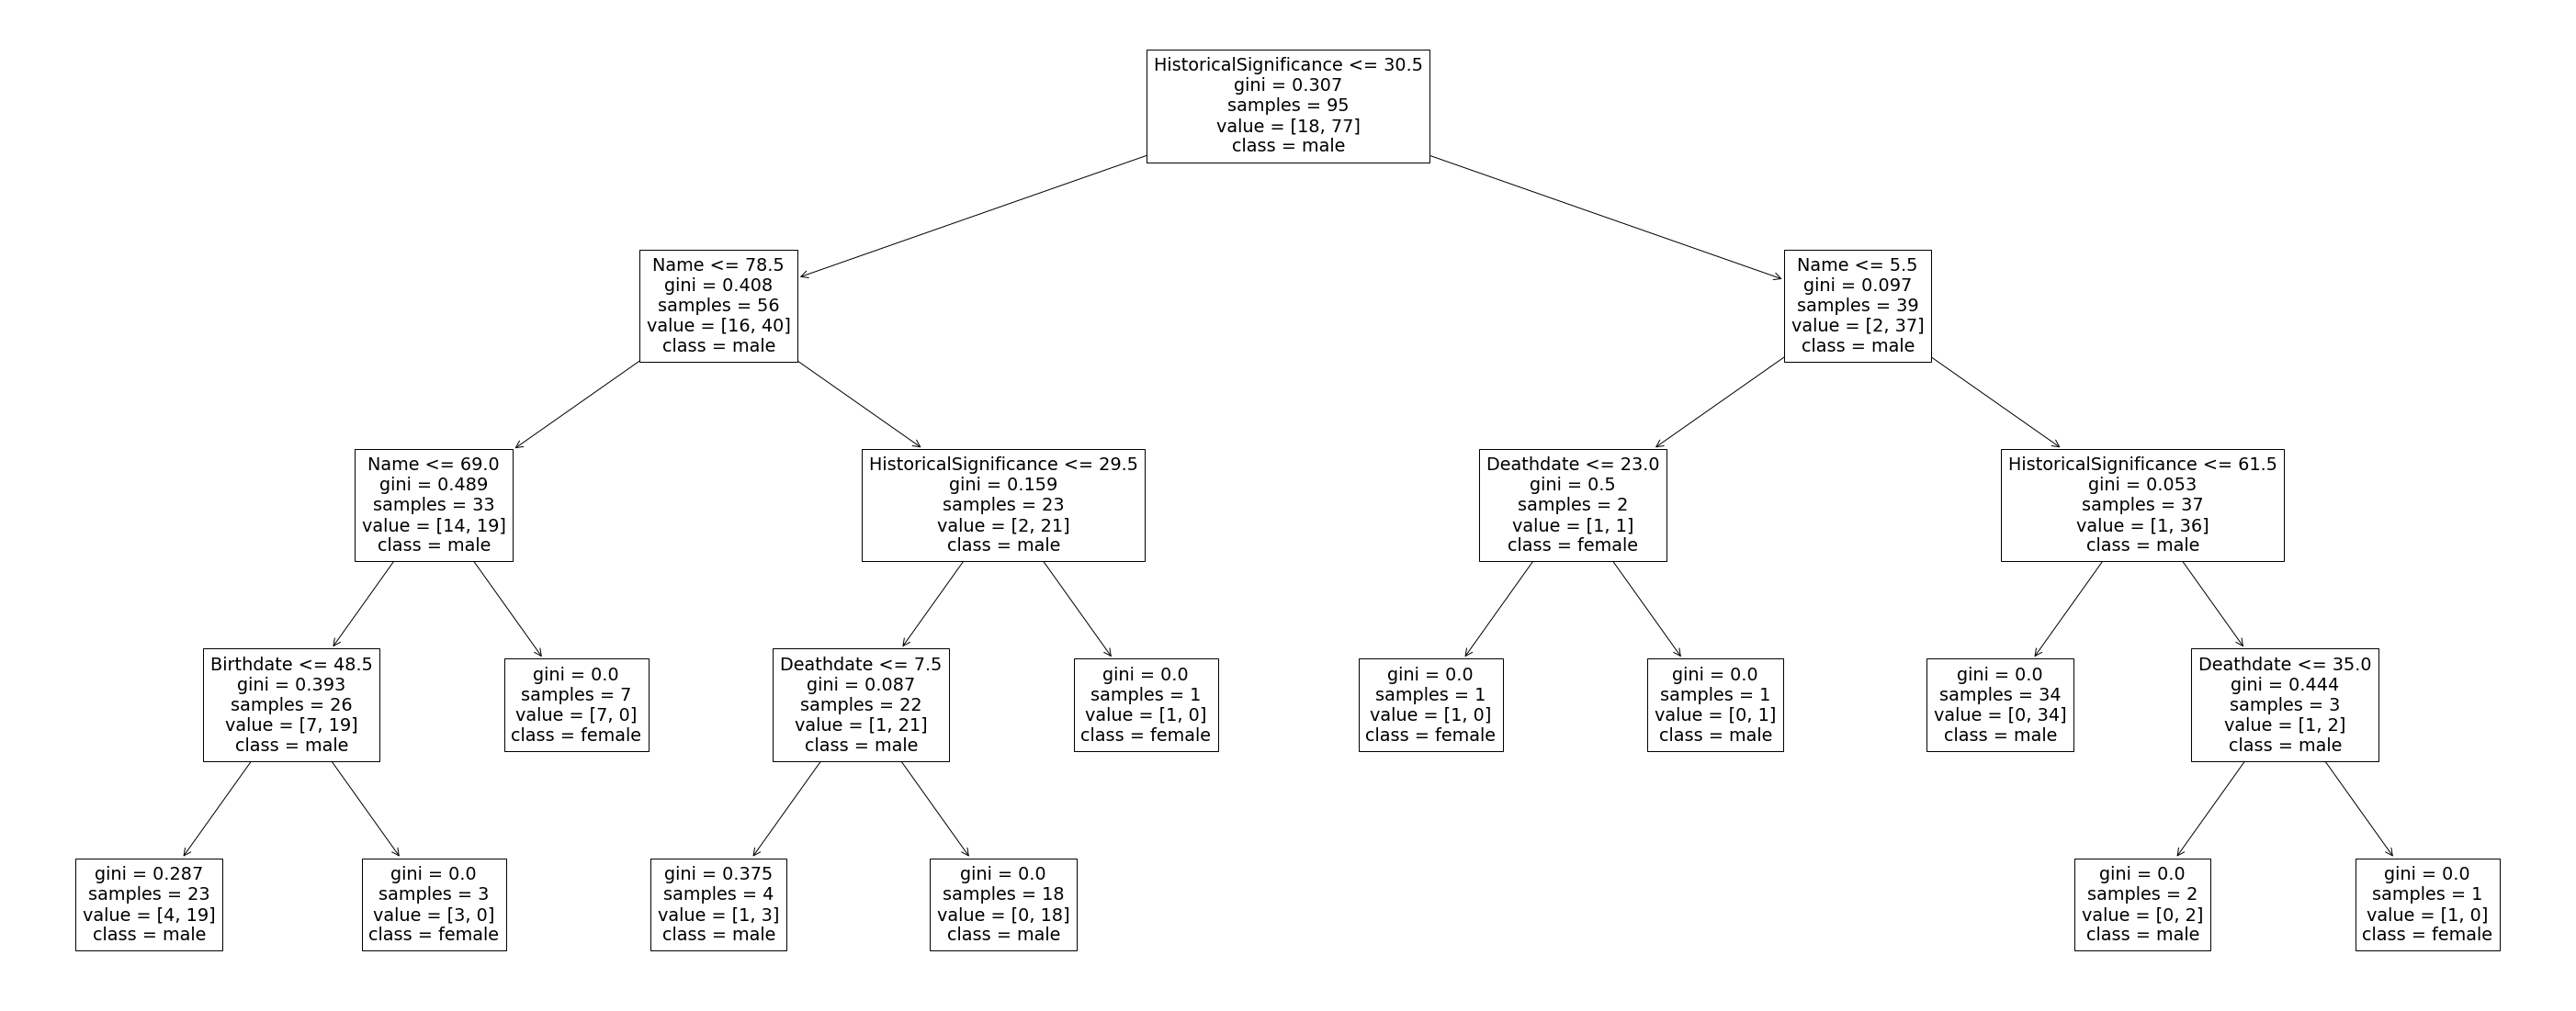

In [89]:
pyplot.figure(figsize=(50, 20))  # Anchura y altura del gráfico
árbol = tree.plot_tree(clasif_CART,
                       feature_names=nodos.columns[:-1],
                       class_names=codificador_objetivo.classes_)

El método `predict` devuelve la clase predicha por el modelo para un nuevo ejemplo y el método `score` la tasa de acierto (_accuracy_) sobre un conjunto de datos de prueba.

In [108]:
predicciones = clasif_CART.predict(codificador_atributos.transform(nuevos_ejemplos))
codificador_objetivo.inverse_transform(predicciones)

array(['male', 'female'], dtype=object)

In [73]:
clasif_CART.score(atributos_prueba, objetivo_prueba)

0.8333333333333334

### kNN

_sklearn_ implementa un modelo _kNN_ clasificador como una instancia de la clase `KNeighborsClassifier`. En https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html se puede encontrar una descripción de las distancias actualmente implementadas que se podrían usar.

In [75]:
from sklearn import neighbors

In [109]:
clasif_kNN = neighbors.KNeighborsClassifier(
    n_neighbors=5,  # Número de vecinos a considerar
    metric='hamming'  # Distancia de Hamming como métrica de cercanía:
                      # fracción de atributos con valores distintos
)
clasif_kNN.fit(atributos_entrenamiento, objetivo_entrenamiento)

KNeighborsClassifier(metric='hamming')

El método `kneighbors` permite encontrar los (índices de los) $k$ vecinos más cercanos de los ejemplos proporcionados, así como las distancias a las que se encuentran.

In [110]:
distancias, vecinos = clasif_kNN.kneighbors(codificador_atributos.transform(nuevos_ejemplos))

In [112]:
# Vecinos más cercanos y distancia a ellos del primer ejemplo nuevo
print("Primer ejemplo nuevo:")
print(nuevos_ejemplos.iloc[[0]])
print()
print("5 vecinos más cercanos:")
print(pd.DataFrame(codificador_atributos.inverse_transform(atributos_entrenamiento[vecinos[0]]),
                       columns=nodos.columns[:-1],
                       index=vecinos[0]).assign(
    distancia=distancias[0],
    clase=codificador_objetivo.inverse_transform(objetivo_entrenamiento[vecinos[0]])
))

Primer ejemplo nuevo:
           Name HistoricalSignificance  Birthdate  Deathdate        ID
0  Joseph Wyeth       religious writer       1621       1751  10013191

5 vecinos más cercanos:
                          Name         HistoricalSignificance Birthdate  \
17                Joseph Wyeth               religious writer      1663   
16           Humphrey Woolrich               religious writer      1633   
67                 James Logan  colonial official and scholar      1674   
53      George Fox the younger               religious writer      1551   
60  Alexander Skene of Newtyle    local politician and author      1621   

   Deathdate        ID  distancia clase  
17      1731  10013191        0.4  male  
16      1707  10013112        0.8  male  
67      1751  10007567        0.8  male  
53      1661  10004523        0.8  male  
60      1694  10011149        0.8  male  


In [114]:
# Vecinos más cercanos y distancia a ellos del segundo ejemplo nuevo
print("Segundo ejemplo nuevo:")
print(nuevos_ejemplos.iloc[[1]])
print()
print("5 vecinos más cercanos:")
print(pd.DataFrame(codificador_atributos.inverse_transform(atributos_entrenamiento[vecinos[1]]),
                       columns=nodos.columns[:-1],
                       index=vecinos[1]).assign(
    distancia=distancias[1],
    clase=codificador_objetivo.inverse_transform(objetivo_entrenamiento[vecinos[1]])
))

Segundo ejemplo nuevo:
           Name    HistoricalSignificance  Birthdate  Deathdate        ID
1  Lilias Skene  Quaker preacher and poet       1676       1697  10011152

5 vecinos más cercanos:
                Name            HistoricalSignificance Birthdate Deathdate  \
87      John ap John                     Quaker leader      1625      1697   
38     Grace Chamber                   Quaker minister      1676      1762   
9   Alexander Parker        Quaker preacher and author      1628      1689   
18       David Lloyd  lawyer and politician in America      1656      1731   
55    Benjamin Furly     merchant and religious writer      1636      1714   

          ID  distancia   clase  
87  10000243        0.8    male  
38  10002274        0.8  female  
9   10009307        1.0    male  
18  10007509        1.0    male  
55  10004625        1.0    male  


El método `predict` devuelve la clase predicha por el modelo para un nuevo ejemplo y el método `score` la tasa de aciertos (_accuracy_) sobre un conjunto de datos de prueba.

In [115]:
predicciones = clasif_kNN.predict(codificador_atributos.transform(nuevos_ejemplos))
codificador_objetivo.inverse_transform(predicciones)

array(['male', 'male'], dtype=object)

In [116]:
clasif_kNN.score(atributos_prueba, objetivo_prueba)

0.8333333333333334

### Centralidad de personas más relacionadas

In [40]:
pd.DataFrame.from_dict(nx.algorithms.centrality.degree_centrality(graph), 
                       orient='index',
                       columns = ['grado_centralidad'])\
            .sort_values(['grado_centralidad'], 
                         ascending = False)\
            .head(10)

,grado_centralidad
George Fox,0.186441
William Penn,0.152542
James Nayler,0.135593
George Whitehead,0.110169
Margaret Fell,0.110169
Benjamin Furly,0.084746
Edward Burrough,0.076271
Thomas Ellwood,0.067797
George Keith,0.067797
Francis Howgill,0.059322


### Centralidad de personas más cercanas

In [41]:
pd.DataFrame.from_dict(nx.closeness_centrality(graph), 
                       orient='index', 
                       columns = ['centralidad_proximidad']) \
            .sort_values(['centralidad_proximidad'], ascending = False) \
            .head(10)

,centralidad_proximidad
George Fox,0.392221
William Penn,0.373088
George Whitehead,0.354088
Margaret Fell,0.338421
James Nayler,0.331095
George Keith,0.325460
Benjamin Furly,0.321357
Thomas Ellwood,0.302305
Edward Burrough,0.297599
Rebecca Travers,0.297599


### Centralidad de puentes

In [134]:
pd.DataFrame.from_dict(nx.algorithms.centrality.betweenness_centrality(graph), 
                       orient='index', 
                       columns = ['centralidad_intermedio'])\
            .sort_values(['centralidad_intermedio'], 
                         ascending = False)\
            .head(10)

,centralidad_intermedio
William Penn,0.239995
George Fox,0.236833
George Whitehead,0.126320
Margaret Fell,0.121068
James Nayler,0.104460
Benjamin Furly,0.064196
Thomas Ellwood,0.046191
George Keith,0.045007
John Audland,0.041649
Alexander Parker,0.038937
